Jumlah baris dan kolom: (395, 33)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 

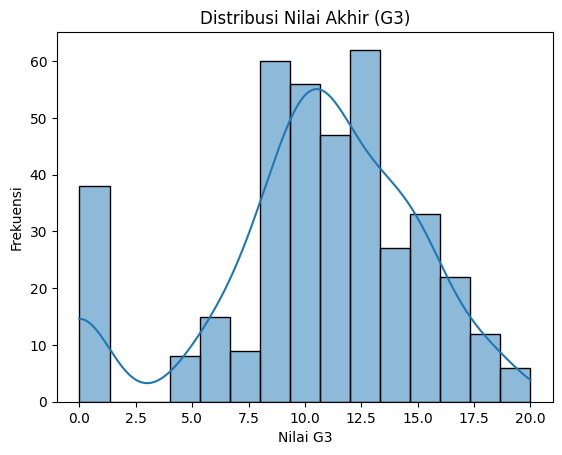

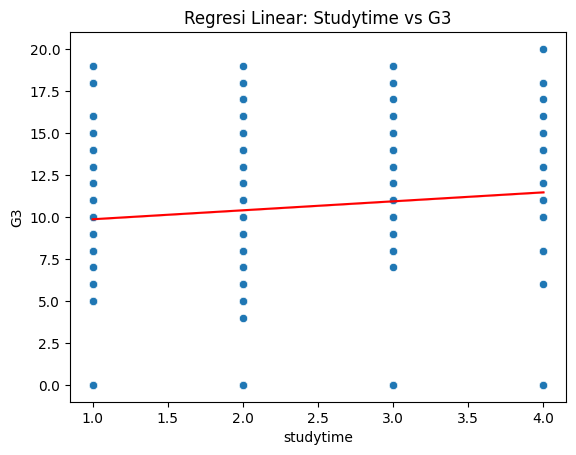

Koefisien regresi: [0.53400113]
Intercept: 9.328260988559856


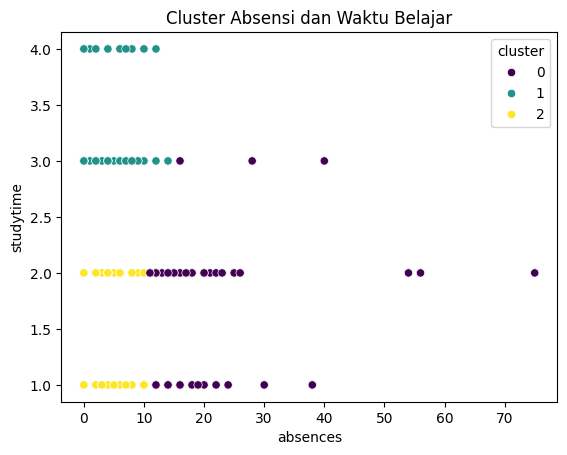


Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        14
         Low       0.91      0.32      0.47        63
      Medium       0.41      0.95      0.58        42

    accuracy                           0.50       119
   macro avg       0.44      0.42      0.35       119
weighted avg       0.63      0.50      0.45       119



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


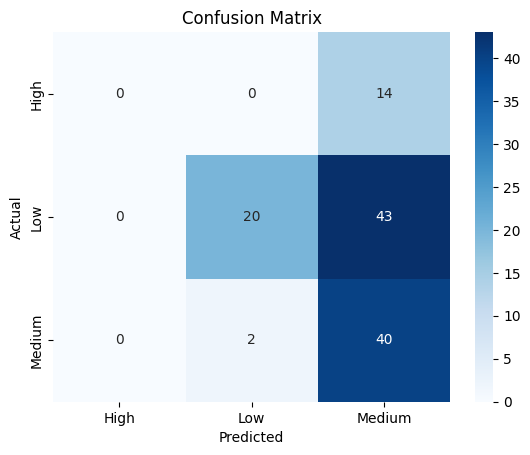

In [5]:
# Student Performance Analysis


# 1. Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2. Load Dataset
df = pd.read_csv("student-mat.csv", sep=";")

# 3. EDA (Exploratory Data Analysis)
print("Jumlah baris dan kolom:", df.shape)
print("\nInformasi dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())
print("\nKolom-kolom:", df.columns.tolist())

# Penjelasan kolom
column_descriptions = {
    'school': 'Sekolah tempat siswa belajar (GP atau MS)',
    'sex': 'Jenis kelamin siswa (F atau M)',
    'age': 'Usia siswa',
    'address': 'Alamat siswa (U untuk urban, R untuk rural)',
    'famsize': 'Ukuran keluarga (LE3 untuk keluarga kecil, GT3 untuk keluarga besar)',
    'Pstatus': 'Status orang tua (T untuk tinggal bersama, A untuk tinggal terpisah)',
    'medu': 'Pendidikan ibu (0-4, di mana 4 adalah pendidikan tertinggi)',
    'fedu': 'Pendidikan ayah (0-4, di mana 4 adalah pendidikan tertinggi)',
    'Mjob': 'Pekerjaan ibu (teacher, health, services, at_home, other)',
    'Fjob': 'Pekerjaan ayah (teacher, health, services, at_home, other)',
    'reason': 'Alasan memilih sekolah (home, reputation, course, other)',
    'guardian': 'Wali siswa (mother, father, other)',
    'traveltime': 'Waktu perjalanan ke sekolah (1-4, di mana 4 adalah waktu terlama)',
    'studytime': 'Waktu belajar per minggu (1-4, di mana 4 adalah waktu belajar terlama)',
    'failures': 'Jumlah kegagalan dalam mata pelajaran (0-3)',
    'absences': 'Jumlah ketidakhadiran',
    'G1': 'Nilai pertama (1-20)',
    'G2': 'Nilai kedua (1-20)',
    'G3': 'Nilai akhir (1-20)'
}

for column, description in column_descriptions.items():
    print(f"{column}: {description}")

# Visualisasi distribusi nilai akhir (G3)
sns.histplot(df['G3'], bins=15, kde=True)
plt.title("Distribusi Nilai Akhir (G3)")
plt.xlabel("Nilai G3")
plt.ylabel("Frekuensi")
plt.show()

# 4. Regresi Linear (studytime vs G3)
X = df[['studytime']]
y = df['G3']
model = LinearRegression()
model.fit(X, y)

df['G3_pred'] = model.predict(X)
sns.scatterplot(x='studytime', y='G3', data=df)
sns.lineplot(x='studytime', y='G3_pred', data=df, color='red')
plt.title("Regresi Linear: Studytime vs G3")
plt.show()

print("Koefisien regresi:", model.coef_)
print("Intercept:", model.intercept_)

# 5. Clustering (absences & studytime)
cluster_data = df[['absences', 'studytime']]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(cluster_scaled)

sns.scatterplot(x='absences', y='studytime', hue='cluster', data=df, palette='viridis')
plt.title("Cluster Absensi dan Waktu Belajar")
plt.show()

# 6. Klasifikasi G3 (Low, Medium, High)
def label_g3(g3):
    if g3 <= 10:
        return 'Low'
    elif g3 <= 15:
        return 'Medium'
    else:
        return 'High'

df['G3_label'] = df['G3'].apply(label_g3)

X = df[['studytime', 'failures', 'absences']]
y = df['G3_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
